## Import relevant packages

In [1]:
# Import relevant packages 
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

2024-03-01 14:45:56.172523: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load the data

In [2]:
data = pd.read_csv('data/train.csv')
print("Full train dataset shape is {}".format(data.shape))

Full train dataset shape is (8693, 14)


## Explore the data

In [3]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

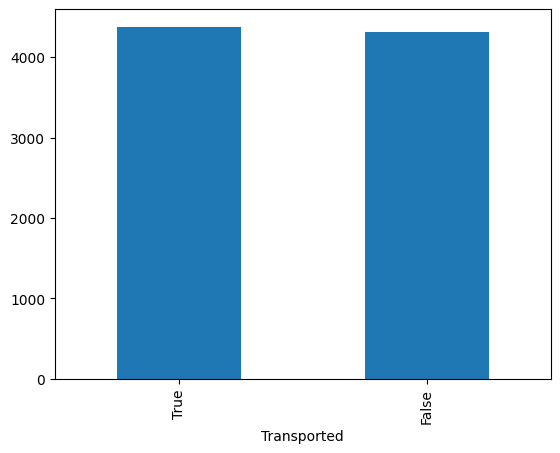

In [6]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

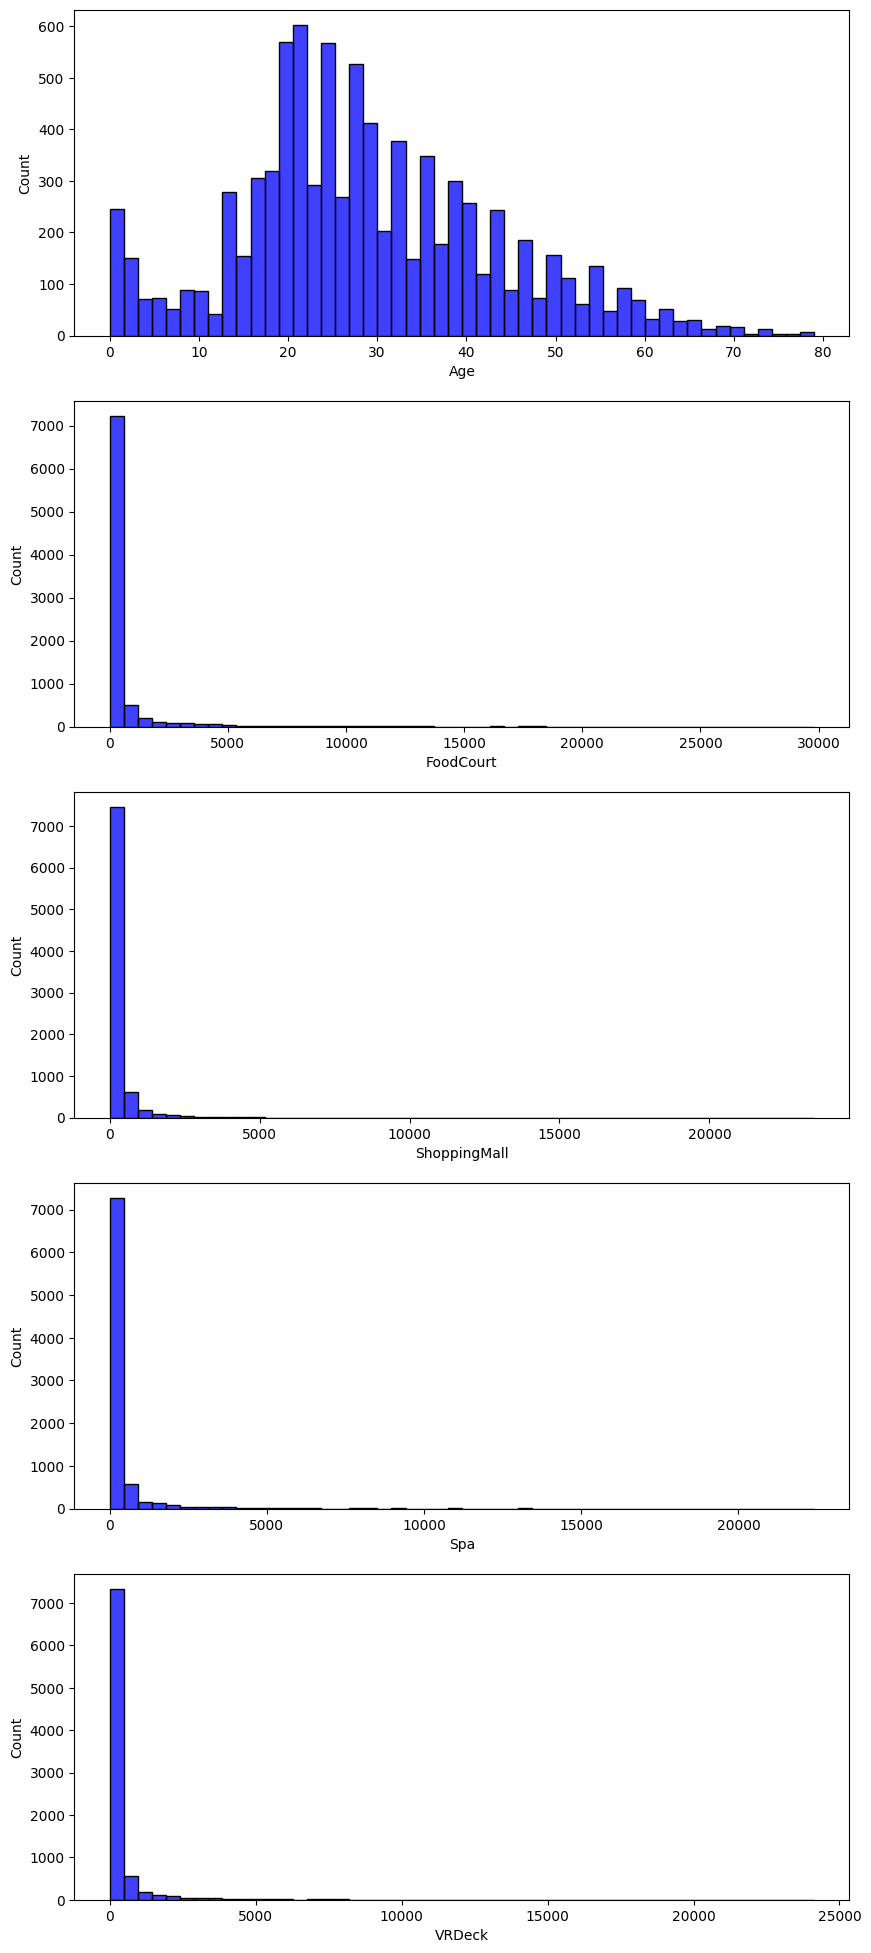

In [7]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);

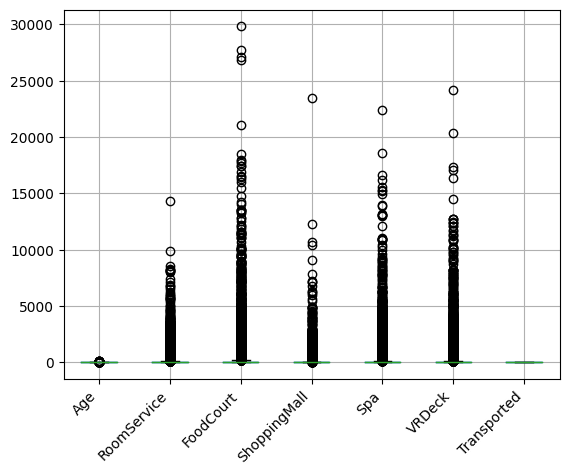

In [8]:
data.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

## Clean the dataset

In [9]:
y = data.Transported
data=data.iloc[:,0:13]

In [10]:
# PassengerID and Name are not necessary for training
data = data.drop(['PassengerId', 'Name'], axis=1)
data.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [11]:
data[["Deck", "Cabin_num", "Side"]] = data["Cabin"].str.split("/", expand=True)
data = data.drop('Cabin', axis=1)

In [12]:
# changing the categorical data to numerical values 

class_labels = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']

for cl in class_labels:
    class_le = LabelEncoder()
    Y_le = class_le.fit_transform(data[cl].values)
    data[cl] = Y_le

y = LabelEncoder().fit_transform(y.values)

In [13]:
# Check for NaN values
print('Column number of missing values')
for c in data.columns:
    n_NaN = data[c].isnull().sum()
    print(f'{c:32} {n_NaN}')

Column number of missing values
HomePlanet                       0
CryoSleep                        0
Destination                      0
Age                              179
VIP                              0
RoomService                      181
FoodCourt                        183
ShoppingMall                     208
Spa                              183
VRDeck                           188
Deck                             0
Cabin_num                        0
Side                             0


In [14]:
# There NaN values in several of the categories which needs to be removed

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)

data = pd.DataFrame(imputed_data, columns=data.columns)


In [15]:
data.shape

(8693, 13)

## Prepare the dataset for training

In [16]:
# Split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=6, stratify=y)

In [17]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_num,Side
3140,2.0,1.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,304.854791,5.0,1423.0,1.0
3149,1.0,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,68.0,0.0
2275,0.0,0.0,0.0,43.0,0.0,6.0,236.0,3.0,448.0,54.000000,5.0,1272.0,0.0
2934,0.0,0.0,2.0,18.0,0.0,0.0,0.0,699.0,0.0,0.000000,5.0,1377.0,1.0
1750,0.0,0.0,0.0,58.0,0.0,14.0,0.0,1081.0,0.0,0.000000,5.0,1121.0,0.0


In [18]:
# Scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

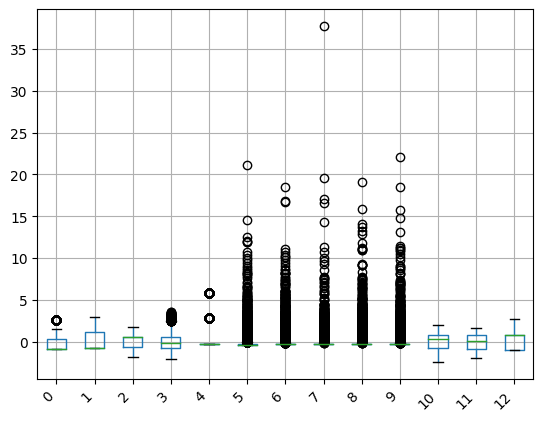

In [20]:
X_train.boxplot()
plt.xticks(rotation=45, ha='right')
plt.show()

### Train the model using grid search

In [21]:
'''
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'probability': [True, False],
    'tol': [1e-3, 1e-4, 1e-5],
    'cache_size': [200, 400, 600],
    'max_iter': [1000, 2000, 3000]
}

# Instantiate SVC classifier
svm_classifier = SVC()

# Grid search cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Best estimator
best_estimator = grid_search.best_estimator_

# Predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

'\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n    \'gamma\': [\'scale\', \'auto\'],\n    \'probability\': [True, False],\n    \'tol\': [1e-3, 1e-4, 1e-5],\n    \'cache_size\': [200, 400, 600],\n    \'max_iter\': [1000, 2000, 3000]\n}\n\n# Instantiate SVC classifier\nsvm_classifier = SVC()\n\n# Grid search cross-validation\ngrid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, n_jobs=-1)\n\n# Fit the grid search to the data\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nbest_params = grid_search.best_params_\nprint("Best Parameters:", best_params)\n\n# Best estimator\nbest_estimator = grid_search.best_estimator_\n\n# Predictions on the test set using the best estimator\ny_pred = best_estimator.predict(X_test)\n\n# Calculate accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

## Train the model

In [22]:
# Start the SVM classifier

svm_classifier = SVC()
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)

In [23]:
# Train the classifier
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [24]:
# Predict on the test set and calculate the accuracy
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM accuracy: ', accuracy_svm)

y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('LR accuracy: ', accuracy_lr)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('RF accuracy: ', accuracy_rf)

SVM accuracy:  0.7952453987730062
LR accuracy:  0.7848926380368099
RF accuracy:  0.8021472392638037


## Load the test dataset

In [25]:
test_data = pd.read_csv('data/test.csv')

submission_id = test_data.PassengerId

# Remove Name and passengerID
test_data = test_data.drop(['PassengerId', 'Name'], axis=1)

test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Change the categorical values to numerical values
class_labels = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']

for cl in class_labels:
    class_le = LabelEncoder()
    Y_le = class_le.fit_transform(test_data[cl].values)
    test_data[cl] = Y_le

# replace Nan values
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(test_data.values)
imputed_data = imr.transform(test_data.values)

test_data = pd.DataFrame(imputed_data, columns=test_data.columns)

# Scale the test data
test_data = pd.DataFrame(scaler.fit_transform(test_data))


In [26]:
# Make predictions for the test dataset
predictions = svm_classifier.predict(test_data)
bool_predictions = (predictions > 0.5).astype(bool)

output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': bool_predictions})

output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [27]:
# Create a csv for Kaggle 
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['Transported'] = bool_predictions
sample_submission_df.to_csv('data/submission.csv', index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
